In [10]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import facenet_pytorch as fn

In [50]:
mtcnn = fn.MTCNN(select_largest=False, device='cpu')
mtcnn

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

In [73]:
cap.get(7)

731.0

(-0.5, 639.5, 479.5, -0.5)

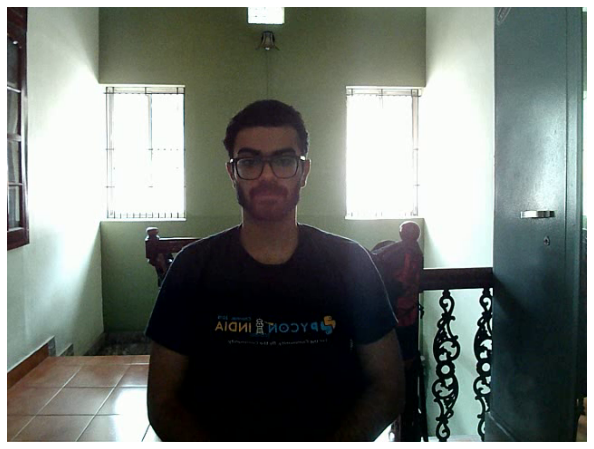

In [76]:
cap = cv2.VideoCapture('output.avi')
cap.set(1, 160)
success, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')



In [77]:
face, probs, landmarks = mtcnn.detect(Image.fromarray(frame), 
                                      landmarks=True)
landmarks

array([[[269.44125, 170.18155],
        [305.04785, 169.00299],
        [284.22183, 190.36179],
        [271.18872, 208.54773],
        [304.37808, 207.8801 ]]], dtype=float32)

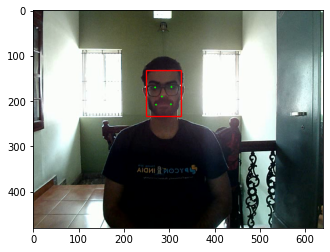

In [78]:
x1, y1, x2, y2 = face.squeeze()
cv2.rectangle(frame, (x1, y1),
              (x2, y2), (255, 0, 0), 2)
for point in landmarks.squeeze():
    x, y = point
    cv2.circle(frame, (x, y), radius=2, 
              color=(0, 255, 0), thickness=-1)
plt.imshow(frame)